In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diamond Price Prediction.csv')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [11]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.shape

(53940, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [14]:
(df.x == 0).sum()


8

In [15]:
(df.y == 0).sum()

7

In [16]:
(df.z == 0).sum()

20

In [17]:
df[df.x == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [18]:
df[['x','y','z']]=df[['x','y','z']].replace(0,np.NaN)

In [19]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53920.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


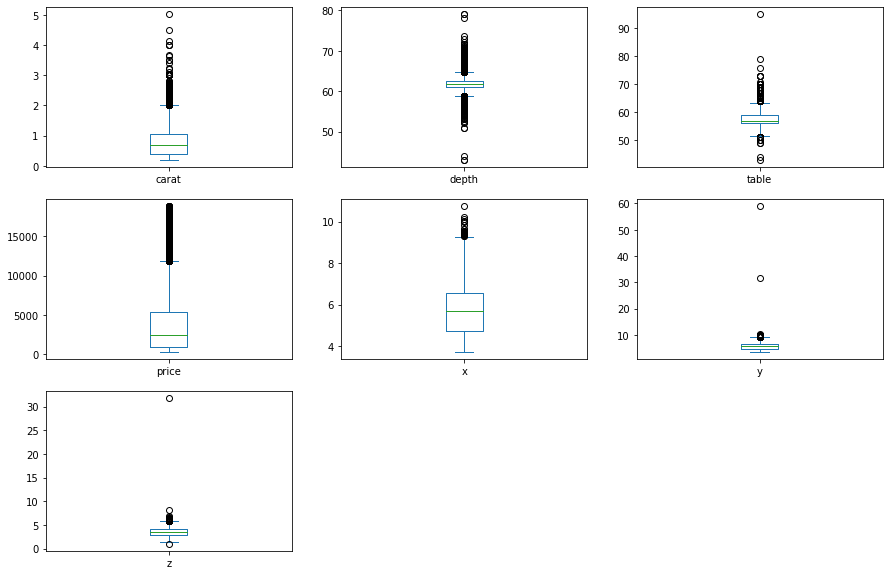

In [20]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [21]:
def outliers(var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [22]:
df.isna().sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            32
y            29
z            49
dtype: int64

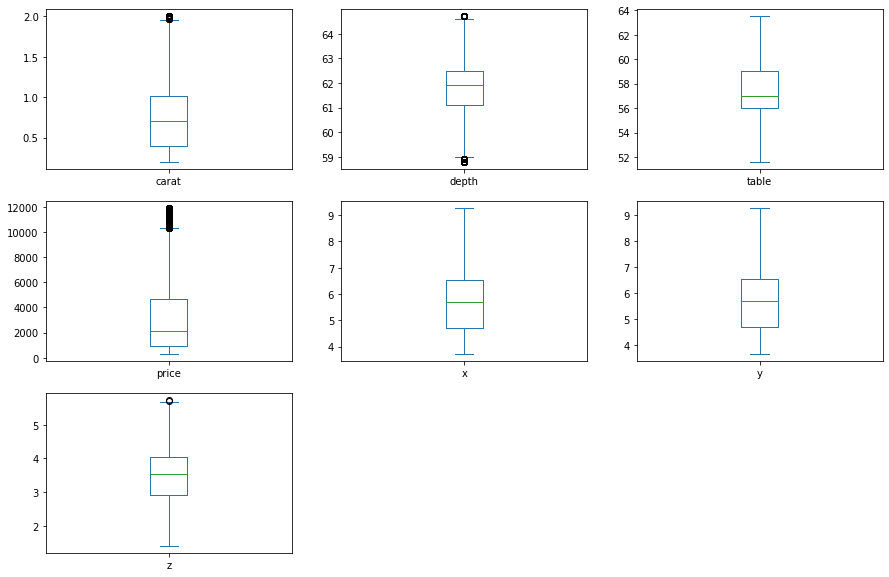

In [23]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


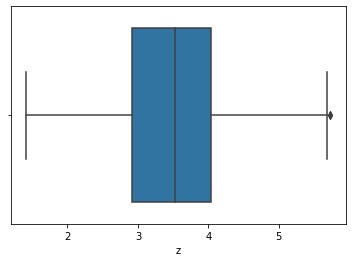

In [24]:
sns.boxplot(df['z'])

In [25]:
df.describe()

,carat,depth,table,price,x,y,z
count,52051.000000,51395.000000,53335.000000,50400.000000,53908.000000,53911.000000,53891.000000
mean,0.748738,61.776373,57.373404,3159.460833,5.730262,5.732353,3.538265
std,0.402096,1.116727,2.074349,2764.700316,1.116833,1.109132,0.689473
min,0.200000,58.800000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.390000,61.100000,56.000000,911.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2155.000000,5.700000,5.710000,3.530000
75%,1.020000,62.500000,59.000000,4669.000000,6.540000,6.540000,4.030000
max,2.000000,64.700000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [26]:
df.isna().sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            32
y            29
z            49
dtype: int64

In [27]:
for i in df.select_dtypes(exclude='object').columns:
    df[i]=df[i].fillna(df[i].mean())

In [28]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.748738,61.776373,57.373404,3159.460833,5.730262,5.732353,3.538265
std,0.394993,1.090063,2.062683,2672.437619,1.116502,1.108833,0.689160
min,0.200000,58.800000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,61.200000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.010000,62.500000,59.000000,4478.000000,6.540000,6.540000,4.030000
max,2.000000,64.700000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [29]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.000000,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.800000,61.000000,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,61.776373,57.373404,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400000,58.000000,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.300000,58.000000,335.0,4.34,4.35,2.75


In [31]:
df_cat = df.select_dtypes(include='object')
df_cat['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [32]:
df_cat['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [33]:
df_cat['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [34]:
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [35]:
df = df.drop(df_cat,axis=1)

In [36]:
df = pd.concat([df,df_cat],axis=1)


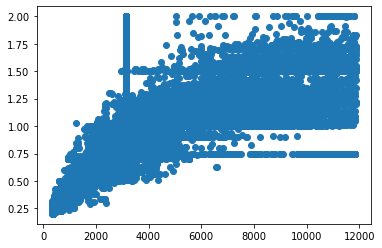

In [37]:
plt.scatter(df['price'],df['carat'])

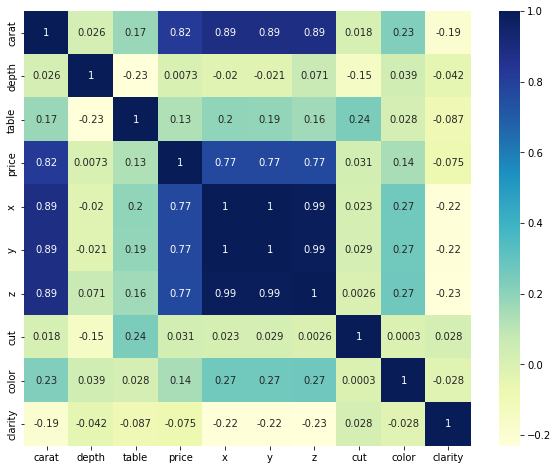

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


In [39]:
X = df.drop('price',axis=1)
y = df['price']

In [40]:
xc = st.add_constant(X)
lm = st.OLS(y,xc).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:49:18   Log-Likelihood:            -4.6957e+05
No. Observations:               53940   AIC:                         9.392e+05
Df Residuals:                   53930   BIC:                         9.393e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2597.0101    524.300     -4.953      0.000   -3624.642   -1569.378
carat       4438.2098     35.189    126.126      0.000    4369.240    4507.180
depth          7.1778      7.527      0.954      0.340      -7.575      21.930
table        -28.2269      3.307     -8.536      0.000     -34.708     -21.745
x           -337.8163     98.656     -3.424      0.001    -531.183    -144.450
y            992.9701    100.950      9.836      0.000     795.108    1190.832
z           -152.4710     82.496     -1.848      0.065    -314.164       9.222
cut           35.0199      6.400      5.472      0.000      22.476      47.564
color       -102.8982      3.850    -26.726      0.000    -110.444     -95.352
clarity      148.6779      3.764     39.503      0.000     141.301     156.055
==============================================================================
Omnibus:                     7178.147   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92876.695
Skew:                          -0.093   Prob(JB):                         0.00
Kurtosis:                       9.426   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
vif = [variance_inflation_factor(X.values,col) for col in range(0,X.shape[1])]

In [43]:
pd.DataFrame({'vif':vif,'cols':X.columns})

,vif,cols
0,22.213586,carat
1,719.185537,depth
2,721.398448,table
3,8362.942470,x
4,8402.682277,y
5,1689.445843,z
6,7.838489,cut
7,3.605566,color
8,6.282162,clarity


In [44]:
df.corr()

,carat,depth,table,price,x,y,z,cut,color,clarity
carat,1.000000,0.025622,0.173995,0.824994,0.888945,0.888285,0.888844,0.018450,0.227865,-0.189216
depth,0.025622,1.000000,-0.230119,0.007329,-0.019812,-0.021461,0.071088,-0.146605,0.039424,-0.041922
table,0.173995,-0.230119,1.000000,0.129450,0.195324,0.190778,0.160531,0.240303,0.027610,-0.087290
price,0.824994,0.007329,0.129450,1.000000,0.771202,0.772181,0.768656,0.031112,0.143089,-0.074838
x,0.888945,-0.019812,0.195324,0.771202,1.000000,0.998239,0.988981,0.022982,0.269579,-0.224271
y,0.888285,-0.021461,0.190778,0.772181,0.998239,1.000000,0.989077,0.028797,0.269585,-0.221457
z,0.888844,0.071088,0.160531,0.768656,0.988981,0.989077,1.000000,0.002638,0.273645,-0.227513
cut,0.018450,-0.146605,0.240303,0.031112,0.022982,0.028797,0.002638,1.000000,0.000304,0.028235
color,0.227865,0.039424,0.027610,0.143089,0.269579,0.269585,0.273645,0.000304,1.000000,-0.027795
clarity,-0.189216,-0.041922,-0.087290,-0.074838,-0.224271,-0.221457,-0.227513,0.028235,-0.027795,1.000000


In [45]:
X = df.drop(['price'],axis=1)
y = df['price']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7038825799394954

In [48]:
y_pred

array([ 232.98574969, 2847.00741998, 1729.61414328, ..., 3228.29885593,
        732.67296244, 2196.37506859])

In [49]:
y_test

1388       559.0
50052     2201.0
41645     1238.0
42377     1304.0
17244     6901.0
          ...   
31474      765.0
22112    10138.0
134       2765.0
31314      758.0
44272     1576.0
Name: price, Length: 17801, dtype: float64

In [50]:
rr  = RandomForestRegressor()

In [51]:
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)
r2_score(y_test,y_pred)

0.9127762556422159

In [52]:
rr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [53]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20]}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv = 3)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]})

In [55]:
y_pred = rf_random.predict(X_test)
r2_score(y_test,y_pred)

0.9132875980246655

In [56]:
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [57]:
rf = RandomForestRegressor(n_estimators=178,min_samples_split=5,min_samples_leaf=1,max_depth=50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.9132799802710461